In [1]:
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

In [2]:
(x_train,t_train),(x_test,t_test) = load_mnist(normalize=True,one_hot_label=True)

In [3]:
#设置超参数
iters_num = 10000
train_size = x_train.shape[0]
batch_size  =100
learning_rate = 0.1

In [4]:
train_loss_list = []
train_acc_list = []
test_acc_list = []
#平均每一个epoch的重复次数
iter_per_epoch = max(train_size/batch_size,1)

In [5]:
network = TwoLayerNet(input_size=784,hidden_size=50,output_size=10)

In [6]:
for i in range(iters_num):
    #获取mini-batch
    batch_mask = np.random.choice(train_size,batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    #计算梯度
    grad = network.gradient(x_batch,t_batch)
    
    #更新参数
    for key in ('W1','b1','W2','b2'):
        network.params[key] -= learning_rate*grad[key]
    
    #计算损失
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    
    #计算每一个epoch的识别精度
    if i % iter_per_epoch == 0:#每执行完一个epoch周期，进行一次计算
        train_acc = network.accuracy(x_train,t_train)
        test_acc = network.accuracy(x_test,t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        
        print("train acc,test acc | "+str(train_acc)+","+str(test_acc))

train acc,test acc | 0.10218333333333333,0.101
train acc,test acc | 0.7815166666666666,0.7915
train acc,test acc | 0.8786333333333334,0.883
train acc,test acc | 0.8976333333333333,0.9011
train acc,test acc | 0.9079833333333334,0.9124
train acc,test acc | 0.9144833333333333,0.9183
train acc,test acc | 0.9193666666666667,0.9221
train acc,test acc | 0.92425,0.9261
train acc,test acc | 0.9270166666666667,0.9286
train acc,test acc | 0.9312333333333334,0.9326
train acc,test acc | 0.9332,0.9351
train acc,test acc | 0.9353,0.9356
train acc,test acc | 0.9386333333333333,0.9385
train acc,test acc | 0.9403,0.9393
train acc,test acc | 0.9427,0.9409
train acc,test acc | 0.9448166666666666,0.9432
train acc,test acc | 0.9459,0.9447


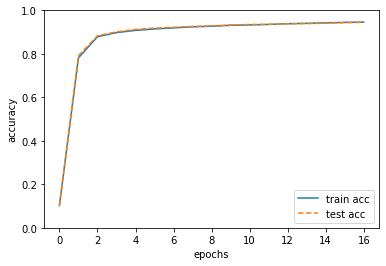

In [7]:
# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()